In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

pd.set_option('display.max_columns',500)

In [2]:
df=pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**1. Buatlah Histogram distribusi data harga rumah (Price), judul 'Distribusi Harga Rumah' size 15**

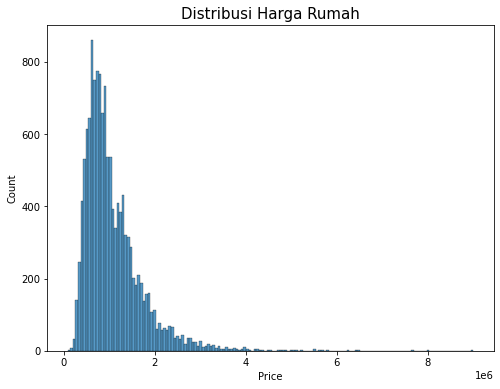

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['Price'], kde = False)
plt.title('Distribusi Harga Rumah', size=15) #judul tabel
plt.xlabel('Price') # labeb x axis
plt.ylabel('Count') #label y axis
plt.show()

**2. Buatlah Boxplot untuk menampilkan distribusi data jarak ke CBD('Distance') dan nama region ('Regionname'). Berikan judul 'Distribusi Jarak ke CBD berdasarkan Nama Region' size 15**

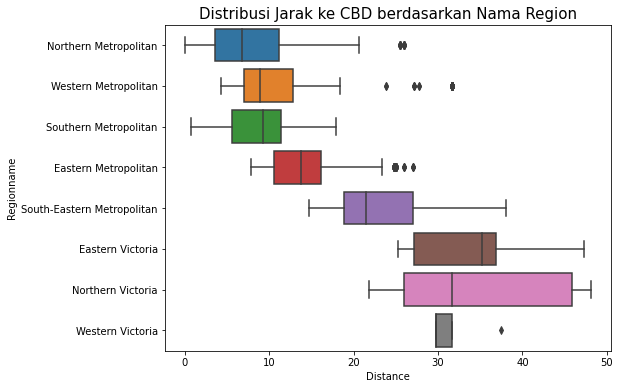

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Distance',y='Regionname',data=df)
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region', size=15)
plt.show()

**3. Buatlah Barplot untuk membandingkan median harga ('Price') ci tiap tipe rumah ('Type'). tambahkan judul 'Perbandingan Nilai Median Harga Rumah' size 15**

In [15]:
df_by_type=df[['Price','Type']].groupby('Type').median().reset_index()
df_by_type

,Type,Price
0,h,1080000.0
1,t,846750.0
2,u,560000.0


In [16]:
x=df['Type'].unique().tolist()
y=df_by_type['Price']

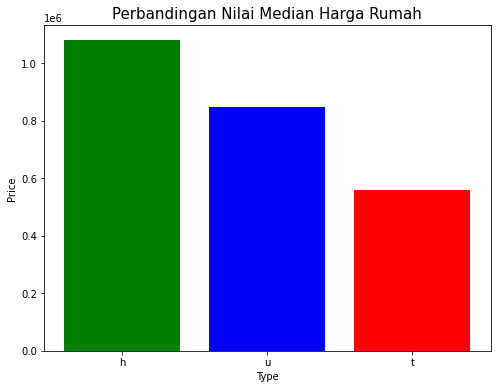

In [18]:
plt.figure(figsize=(8,6))

plt.bar(x,y, color=['g','b','r'])
plt.title('Perbandingan Nilai Median Harga Rumah', size=15)
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

**4. Buatlah Scatter Plot untuk menampilkan korelasi antara harga rumah ('Price') dengan jarak ke CBD ('Distance'). Bedakan warna titik berdasarkan 'Type'. Tambahkan Judul 'Korelasi Harga Rumah dan Jarak Rumah ke CBD' size 15**

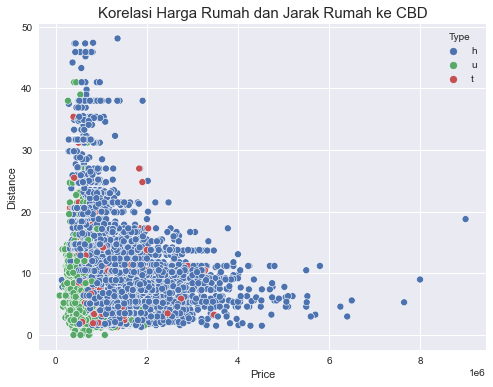

In [21]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn')
sns.scatterplot(data=df, x='Price', y='Distance', hue='Type')
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD', size=15)
plt.show()

**5. Konversi kolom 'Date' menjadi tipe data 'datetime64'. Buat kolom baru dengan nama 'Month' hasil ekstraksi data bulan dari kolom 'Date'**
<br>
**Buat Line Plot menampilkan tren perkembangan harga rumah ('Price') tiap bulan**
<br>
**Bedakan warna garis berdasarkan 'Type', tambahkan judul 'Tren Harga Rumah per Bulan berdasarkan Tipe Rumah' size 15**

In [31]:
df['Month'] = pd.to_datetime(df['Date'])

In [32]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016-03-12
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016-04-02
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017-04-03
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017-04-03
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016-04-06


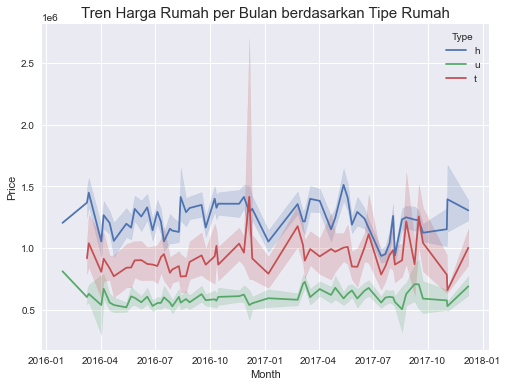

In [40]:
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Month', y='Price', hue='Type')
plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah',size=15)
plt.show()

**6. Kelompokkan total luas tanah ('Landsize') berdasarkan ('Regionname'), lalu simpan ke dataframe baru**
<br>
**buat Pie Chart menampilkan proporsi total luas tanah di tiap region**
<br>
**tambahkan explode agar potongan diagram terpisah**
<br>
**tambahkan judul 'Proporsi Luas Tanah tiap Region' size 20**

In [45]:
df_by_landsize=df[['Landsize','Regionname']].groupby('Regionname').sum().reset_index()
df_by_landsize

,Regionname,Landsize
0,Eastern Metropolitan,932811.0
1,Eastern Victoria,156334.0
2,Northern Metropolitan,2213208.0
3,Northern Victoria,137574.0
4,South-Eastern Metropolitan,276296.0
5,Southern Metropolitan,2390939.0
6,Western Metropolitan,1455153.0
7,Western Victoria,20976.0


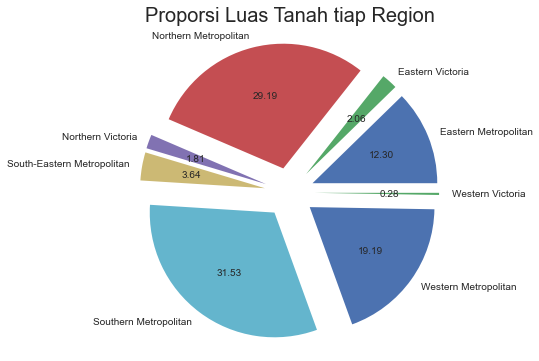

In [53]:
plt.figure(figsize=(8,6))
plt.pie(
    df_by_landsize['Landsize'],
    labels=df_by_landsize['Regionname'],
    autopct='%.2f',
    explode=(0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2)) #autopct untuk emberi label data, 2 angka di belakang koma
    
plt.axis('equal') #agar pie chart ditengah
plt.title('Proporsi Luas Tanah tiap Region', size=20)
plt.show()

**7. Buatlah correlation matrix yang berisi 'Distance','Landsize','Rooms'**
<br>
**Lalu buat correlation heatmap untuk memvisualisasikan korelasi antar variabel, annot=True**
<br>
**judul 'Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar' size 20**

In [57]:
corr_matrix=df[['Price','Distance','Landsize','Rooms']].corr()
corr_matrix

,Price,Distance,Landsize,Rooms
Price,1.000000,-0.162522,0.037507,0.496634
Distance,-0.162522,1.000000,0.025004,0.294203
Landsize,0.037507,0.025004,1.000000,0.025678
Rooms,0.496634,0.294203,0.025678,1.000000


<AxesSubplot:>

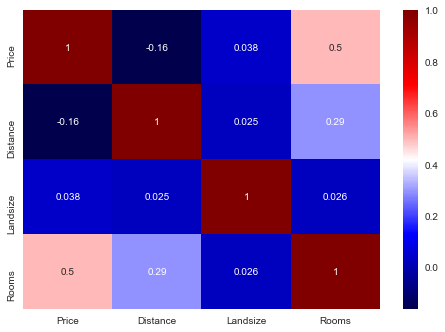

In [59]:
sns.heatmap(corr_matrix, annot=True, cmap='seismic')

**8. Urutkan data berdasarkan harga ('Price') dan tampilkan 10 data dari harga rumah tertinggi dan simpan ke DataFrame baru**
<br>
**Buat peta 'Melbourne' yang berlokasi di [-37.8136, 144.9631] dan zoom_start 11**
<br>
**didalam peta tambahkan 10 marker sesuai lokasi 10 rumah dengan harga tertinggi**
<br>
**didalam marker, popup berisi harga rumah dan tooltip alamat rumah**

In [71]:
df_by_price=df[['Price','Address','Lattitude','Longtitude']].sort_values('Price', ascending=False).head(10)
df_by_price

,Price,Address,Lattitude,Longtitude
12094,9000000.0,35 Bevis St,-37.93168,145.16126
7692,8000000.0,49 Mangarra Rd,-37.81790,145.06940
9575,7650000.0,49 Lisson Gr,-37.82652,145.03052
3616,6500000.0,15 Barry St,-37.80290,145.02670
12557,6400000.0,136 Page St,-37.84908,144.95753
6372,6250000.0,17 Albany Rd,-37.84860,145.02440
7554,5800000.0,161 Church St,-37.91640,144.99740
5631,5700000.0,18 Avoca St,-37.83770,144.98940
9233,5600000.0,204 Page St,-37.85231,144.96373
251,5525000.0,367 Dandenong Rd,-37.86020,145.01300


In [77]:
melbourne_map=folium.Map(location=[-37.8136, 144.9631], zoom_start=11)
folium.Marker([-37.93168, 145.16126],
             popup='9000000.0',
             tooltip='35 Bevis St',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.81790, 145.06940],
             popup='8000000.0',
             tooltip='49 Mangarra Rd',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.82652, 145.03052],
             popup='7650000.0',
             tooltip='49 Lisson Gr',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.80290, 145.02670],
             popup='6500000.0',
             tooltip='15 Barry St',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.84908, 144.95753],
             popup='6400000.0',
             tooltip='136 Page St',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.84860, 145.02440],
             popup='6250000.0',
             tooltip='17 Albany Rd',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.91640, 144.99740],
             popup='5800000.0',
             tooltip='161 Church St',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.83770, 144.98940],
             popup='5700000.0',
             tooltip='18 Avoca St',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.85231, 144.96373],
             popup='5600000.0',
             tooltip='204 Page St',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
folium.Marker([-37.86020, 145.01300],
             popup='5525000.0',
             tooltip='367 Dandenong Rd',
              icon=folium.Icon(color='red', icon='info-sign')
             ).add_to(melbourne_map)
melbourne_map